## 前準備

* 2次元に圧縮
* Umap Algorithm と分散のパラメータチューニング
    * 精度とバリエーション、分散の小ささの交互作用で最適化

In [1]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append('..')
from src.agent import Agent
from omegaconf.dictconfig import DictConfig
from collections import Counter
import numpy as np
from plotnine import *
import numpy as np
import pandas as pd

In [2]:
import optuna


def objective(trial):
    umap_params = {
        "n_components": trial.suggest_categorical('n_components', [2]),
        "random_state": trial.suggest_categorical('random_state', [42]),
        "n_neighbors": trial.suggest_int('n_neighbors', 2, 6),
        "min_dist": trial.suggest_uniform("min_dist", 0.1, 1),  # スケールしてるから1程度
    }
    u_duration = trial.suggest_categorical('u_duration', [0])
    # u_duration = trial.suggest_int('u_duration', 0, 9)
    w_duration = trial.suggest_categorical('w_duration', [3])
    scale = trial.suggest_uniform("scale", 0.1, 0.4)
    config_a = DictConfig({"umap": umap_params, "scale": scale,
                          "u_duration": u_duration, "w_duration": w_duration})
    config_b = DictConfig(
        {"umap": umap_params, "scale": scale, "u_duration": 9, "w_duration": 3})

    a = Agent(config_a)
    b = Agent(config_b)

    n_soku = 0
    # n_u = 0
    n_correct = 0
    perceptions = []
    n_iter = 100  # 精度が増すが計算コストも高くなる
    for n in range(n_iter):
        src = "kawuta"
        phoneme, obs, states = a.production(src)
        obs = np.array(obs).astype('double')
        phoneme_hat, obs, states_hat = b.perception(obs)
        perceptions.append(phoneme_hat)
        # n_correct += phoneme_hat == src  # u_durationが0のときに"kawuta"で最適化する必要はない。
        n_soku += phoneme_hat == 'kaQta'  # 音韻論の知識
        # n_u += phoneme_hat == 'kauta'  # 音韻論の知識

    print(Counter(perceptions))
    return n_soku*(1-scale)  # 0のときの促音便、ウ音便で最大化させる。ただしscale は少ないほどよい。


study = optuna.create_study(
    direction="maximize", sampler=optuna.samplers.TPESampler(seed=42))
study.optimize(objective, n_trials=100)

[I 2021-05-04 15:53:25,776] A new study created in memory with name: no-name-bcd99e4a-2778-4eb8-b56e-f073b2150e07
[I 2021-05-04 15:53:36,677] Trial 0 finished with value: 2.721607269826314 and parameters: {'n_components': 2, 'random_state': 42, 'n_neighbors': 3, 'min_dist': 0.9556428757689246, 'u_duration': 0, 'w_duration': 3, 'scale': 0.31959818254342154}. Best is trial 0 with value: 2.721607269826314.


Counter({'kata': 41, 'kaota': 34, 'kakota': 5, 'kawota': 5, 'kaQta': 4, 'kawuta': 3, 'kaka': 2, 'kakata': 1, 'kaotaw': 1, 'waota': 1, 'kaotau': 1, 'katau': 1, 'kawua': 1})


[I 2021-05-04 15:53:43,318] Trial 1 finished with value: 0.0 and parameters: {'n_components': 2, 'random_state': 42, 'n_neighbors': 4, 'min_dist': 0.24041677639819287, 'u_duration': 0, 'w_duration': 3, 'scale': 0.1467983561008608}. Best is trial 0 with value: 2.721607269826314.


Counter({'kaota': 34, 'kata': 27, 'kawa': 19, 'kawota': 19, 'kaotau': 1})


[I 2021-05-04 15:53:50,392] Trial 2 finished with value: 29.50628535555853 and parameters: {'n_components': 2, 'random_state': 42, 'n_neighbors': 2, 'min_dist': 0.8795585311974417, 'u_duration': 0, 'w_duration': 3, 'scale': 0.2803345035229627}. Best is trial 2 with value: 29.50628535555853.


Counter({'kaQta': 41, 'kauta': 26, 'kata': 8, 'tauta': 5, 'kaQka': 5, 'taQta': 5, 'kauka': 3, 'kawa': 2, 'kaka': 2, 'tata': 1, 'kaQkao': 1, 'wauta': 1})


[I 2021-05-04 15:53:57,116] Trial 3 finished with value: 9.744432709622426 and parameters: {'n_components': 2, 'random_state': 42, 'n_neighbors': 5, 'min_dist': 0.1185260448662222, 'u_duration': 0, 'w_duration': 3, 'scale': 0.39097295564859835}. Best is trial 2 with value: 29.50628535555853.


Counter({'kata': 78, 'kaQta': 16, 'kaka': 2, 'uata': 1, 'kawa': 1, 'kaQka': 1, 'kataQ': 1})


[I 2021-05-04 15:54:03,041] Trial 4 finished with value: 46.49988804108284 and parameters: {'n_components': 2, 'random_state': 42, 'n_neighbors': 6, 'min_dist': 0.29110519961044856, 'u_duration': 0, 'w_duration': 3, 'scale': 0.1545474901621302}. Best is trial 4 with value: 46.49988804108284.


Counter({'kaQta': 55, 'kawota': 26, 'kaota': 12, 'kawuta': 7})


[I 2021-05-04 15:54:08,759] Trial 5 finished with value: 42.32666501908873 and parameters: {'n_components': 2, 'random_state': 42, 'n_neighbors': 2, 'min_dist': 0.373818018663584, 'u_duration': 0, 'w_duration': 3, 'scale': 0.2574269294896714}. Best is trial 4 with value: 46.49988804108284.


Counter({'kaQta': 57, 'kauta': 28, 'kaQka': 3, 'kawa': 3, 'kaQto': 2, 'taQta': 2, 'kaQko': 1, 'kawuta': 1, 'tauta': 1, 'taQka': 1, 'kauka': 1})


[I 2021-05-04 15:54:14,789] Trial 6 finished with value: 44.41953615816374 and parameters: {'n_components': 2, 'random_state': 42, 'n_neighbors': 4, 'min_dist': 0.36210622617823773, 'u_duration': 0, 'w_duration': 3, 'scale': 0.2835558684167139}. Best is trial 4 with value: 46.49988804108284.


Counter({'kaQta': 62, 'kata': 26, 'kawata': 3, 'kuta': 2, 'kawa': 2, 'kaQka': 2, 'kawuta': 2, 'kauta': 1})


[I 2021-05-04 15:54:20,594] Trial 7 finished with value: 0.7900914470118925 and parameters: {'n_components': 2, 'random_state': 42, 'n_neighbors': 2, 'min_dist': 0.3629301836816964, 'u_duration': 0, 'w_duration': 3, 'scale': 0.20990855298810754}. Best is trial 4 with value: 46.49988804108284.


Counter({'kauta': 48, 'kawuta': 44, 'kawota': 3, 'katao': 1, 'kuta': 1, 'kaQta': 1, 'kata': 1, 'kakuta': 1})


[I 2021-05-04 15:54:26,720] Trial 8 finished with value: 8.400978653524922 and parameters: {'n_components': 2, 'random_state': 42, 'n_neighbors': 4, 'min_dist': 0.8066583652537123, 'u_duration': 0, 'w_duration': 3, 'scale': 0.15990213464750794}. Best is trial 4 with value: 46.49988804108284.


Counter({'kawuta': 46, 'kauta': 32, 'kaQta': 10, 'kawota': 8, 'kata': 1, 'kawa': 1, 'kawotaw': 1, 'kautao': 1})


[I 2021-05-04 15:54:32,863] Trial 9 finished with value: 1.7721297523680013 and parameters: {'n_components': 2, 'random_state': 42, 'n_neighbors': 4, 'min_dist': 0.6331731119758383, 'u_duration': 0, 'w_duration': 3, 'scale': 0.11393512381599932}. Best is trial 4 with value: 46.49988804108284.


Counter({'kawota': 68, 'kaota': 15, 'kawuta': 15, 'kaQta': 2})


[I 2021-05-04 15:54:38,484] Trial 10 finished with value: 18.461554047110855 and parameters: {'n_components': 2, 'random_state': 42, 'n_neighbors': 6, 'min_dist': 0.10369313894200605, 'u_duration': 0, 'w_duration': 3, 'scale': 0.1973237370821367}. Best is trial 4 with value: 46.49988804108284.


Counter({'kauta': 52, 'kaQta': 23, 'kawuta': 14, 'kautao': 3, 'tauta': 2, 'kaQka': 1, 'kawota': 1, 'kawotau': 1, 'kauka': 1, 'kata': 1, 'kawuka': 1})


[I 2021-05-04 15:54:44,577] Trial 11 finished with value: 10.431783945510379 and parameters: {'n_components': 2, 'random_state': 42, 'n_neighbors': 6, 'min_dist': 0.5208733044286327, 'u_duration': 0, 'w_duration': 3, 'scale': 0.34801350340560133}. Best is trial 4 with value: 46.49988804108284.


Counter({'kata': 76, 'kaQta': 16, 'tata': 3, 'kaka': 3, 'kataw': 1, 'kuawoa': 1})


[I 2021-05-04 15:54:50,335] Trial 12 finished with value: 33.171409101632634 and parameters: {'n_components': 2, 'random_state': 42, 'n_neighbors': 5, 'min_dist': 0.3438109219468571, 'u_duration': 0, 'w_duration': 3, 'scale': 0.3089289770493202}. Best is trial 4 with value: 46.49988804108284.


Counter({'kaQta': 48, 'kaota': 35, 'kawa': 4, 'taQta': 4, 'kaQka': 3, 'taota': 2, 'kaoka': 2, 'kawota': 1, 'kaotaQ': 1})


[I 2021-05-04 15:54:56,247] Trial 13 finished with value: 63.864206463423095 and parameters: {'n_components': 2, 'random_state': 42, 'n_neighbors': 5, 'min_dist': 0.5820618376319409, 'u_duration': 0, 'w_duration': 3, 'scale': 0.2016974192072113}. Best is trial 13 with value: 63.864206463423095.


Counter({'kaQta': 80, 'kaota': 8, 'kawota': 7, 'kawuta': 2, 'kaQtau': 1, 'kawa': 1, 'kaQka': 1})


[I 2021-05-04 15:55:02,266] Trial 14 finished with value: 54.10936387050355 and parameters: {'n_components': 2, 'random_state': 42, 'n_neighbors': 5, 'min_dist': 0.6325152723370535, 'u_duration': 0, 'w_duration': 3, 'scale': 0.20427406072788903}. Best is trial 13 with value: 63.864206463423095.


Counter({'kaQta': 68, 'kaota': 22, 'kawota': 7, 'kawuta': 1, 'kata': 1, 'kawa': 1})


[I 2021-05-04 15:55:07,975] Trial 15 finished with value: 29.165652193571827 and parameters: {'n_components': 2, 'random_state': 42, 'n_neighbors': 5, 'min_dist': 0.6297388352504371, 'u_duration': 0, 'w_duration': 3, 'scale': 0.21173912990346413}. Best is trial 13 with value: 63.864206463423095.


Counter({'kaQta': 37, 'kawota': 22, 'kaota': 18, 'kawuta': 16, 'kawua': 7})


[I 2021-05-04 15:55:13,654] Trial 16 finished with value: 39.24932414304104 and parameters: {'n_components': 2, 'random_state': 42, 'n_neighbors': 5, 'min_dist': 0.7505160792404589, 'u_duration': 0, 'w_duration': 3, 'scale': 0.23040540895997966}. Best is trial 13 with value: 63.864206463423095.


Counter({'kaQta': 51, 'kaota': 23, 'kawota': 6, 'kata': 5, 'kawuta': 4, 'kawa': 4, 'kawua': 3, 'taQta': 2, 'kaQtao': 1, 'kauta': 1})


[I 2021-05-04 15:55:20,936] Trial 17 finished with value: 37.69865578287867 and parameters: {'n_components': 2, 'random_state': 42, 'n_neighbors': 5, 'min_dist': 0.5184566150594323, 'u_duration': 0, 'w_duration': 3, 'scale': 0.1024129575505079}. Best is trial 13 with value: 63.864206463423095.


Counter({'kaQta': 42, 'kawota': 39, 'kaota': 18, 'kaQtau': 1})


[I 2021-05-04 15:55:27,267] Trial 18 finished with value: 23.030481055616196 and parameters: {'n_components': 2, 'random_state': 42, 'n_neighbors': 3, 'min_dist': 0.6512553365799675, 'u_duration': 0, 'w_duration': 3, 'scale': 0.17748281944227873}. Best is trial 13 with value: 63.864206463423095.


Counter({'kauta': 64, 'kaQta': 28, 'kawuta': 4, 'kawota': 2, 'kautao': 1, 'kaQtao': 1})


[I 2021-05-04 15:55:33,669] Trial 19 finished with value: 38.777471300280546 and parameters: {'n_components': 2, 'random_state': 42, 'n_neighbors': 6, 'min_dist': 0.7295943697008698, 'u_duration': 0, 'w_duration': 3, 'scale': 0.23965742548469518}. Best is trial 13 with value: 63.864206463423095.


Counter({'kaQta': 51, 'kauta': 41, 'kawuta': 5, 'oaQta': 1, 'kawoa': 1, 'kawota': 1})


[I 2021-05-04 15:55:40,387] Trial 20 finished with value: 25.342413576966297 and parameters: {'n_components': 2, 'random_state': 42, 'n_neighbors': 3, 'min_dist': 0.47438414763406633, 'u_duration': 0, 'w_duration': 3, 'scale': 0.12612366975978284}. Best is trial 13 with value: 63.864206463423095.


Counter({'kauta': 65, 'kaQta': 29, 'kawuta': 6})


[I 2021-05-04 15:55:46,984] Trial 21 finished with value: 15.525744235788434 and parameters: {'n_components': 2, 'random_state': 42, 'n_neighbors': 6, 'min_dist': 0.2176522958877607, 'u_duration': 0, 'w_duration': 3, 'scale': 0.18285556653745083}. Best is trial 13 with value: 63.864206463423095.


Counter({'kauta': 49, 'kawuta': 24, 'kaQta': 19, 'kawota': 5, 'kautau': 1, 'kauka': 1, 'tawuta': 1})


[I 2021-05-04 15:55:52,963] Trial 22 finished with value: 0.0 and parameters: {'n_components': 2, 'random_state': 42, 'n_neighbors': 5, 'min_dist': 0.4477070589154891, 'u_duration': 0, 'w_duration': 3, 'scale': 0.14523869779015777}. Best is trial 13 with value: 63.864206463423095.


Counter({'kata': 36, 'kawa': 26, 'kauta': 23, 'kawuta': 13, 'katuta': 1, 'kawao': 1})


[I 2021-05-04 15:55:58,573] Trial 23 finished with value: 39.14561795303132 and parameters: {'n_components': 2, 'random_state': 42, 'n_neighbors': 6, 'min_dist': 0.583670255126578, 'u_duration': 0, 'w_duration': 3, 'scale': 0.18446629264518083}. Best is trial 13 with value: 63.864206463423095.


Counter({'kaQta': 48, 'kaota': 22, 'kawota': 20, 'kawuta': 6, 'kaQka': 2, 'kawua': 1, 'taota': 1})


[I 2021-05-04 15:56:04,807] Trial 24 finished with value: 52.15081390533102 and parameters: {'n_components': 2, 'random_state': 42, 'n_neighbors': 5, 'min_dist': 0.7166032410833737, 'u_duration': 0, 'w_duration': 3, 'scale': 0.2216296432040146}. Best is trial 13 with value: 63.864206463423095.


Counter({'kaQta': 67, 'kaota': 15, 'kawota': 8, 'kawa': 4, 'kawuta': 3, 'kauta': 2, 'kaQka': 1})


[I 2021-05-04 15:56:11,240] Trial 25 finished with value: 4.424432108412811 and parameters: {'n_components': 2, 'random_state': 42, 'n_neighbors': 5, 'min_dist': 0.7267975431512776, 'u_duration': 0, 'w_duration': 3, 'scale': 0.26259464859786485}. Best is trial 13 with value: 63.864206463423095.


Counter({'kata': 53, 'kawa': 24, 'kauta': 8, 'kaQta': 6, 'tata': 3, 'tatuta': 1, 'kaQtao': 1, 'tawa': 1, 'kawata': 1, 'kauka': 1, 'kaQka': 1})


[I 2021-05-04 15:56:17,198] Trial 26 finished with value: 46.84817604971039 and parameters: {'n_components': 2, 'random_state': 42, 'n_neighbors': 5, 'min_dist': 0.8484005687060532, 'u_duration': 0, 'w_duration': 3, 'scale': 0.21919706583816015}. Best is trial 13 with value: 63.864206463423095.


Counter({'kaQta': 60, 'kaota': 15, 'kawua': 7, 'kawuta': 7, 'kawota': 5, 'kawa': 3, 'kaQka': 1, 'kata': 1, 'kauta': 1})


[I 2021-05-04 15:56:23,439] Trial 27 finished with value: 11.410595393943941 and parameters: {'n_components': 2, 'random_state': 42, 'n_neighbors': 4, 'min_dist': 0.6839227539659257, 'u_duration': 0, 'w_duration': 3, 'scale': 0.23929364040373724}. Best is trial 13 with value: 63.864206463423095.


Counter({'kaota': 68, 'kaQta': 15, 'kawota': 10, 'kawuta': 6, 'kawata': 1})


[I 2021-05-04 15:56:30,120] Trial 28 finished with value: 61.831388111088714 and parameters: {'n_components': 2, 'random_state': 42, 'n_neighbors': 5, 'min_dist': 0.5495651450305129, 'u_duration': 0, 'w_duration': 3, 'scale': 0.1969949595962505}. Best is trial 13 with value: 63.864206463423095.


Counter({'kaQta': 77, 'kaota': 12, 'kawota': 4, 'kaQka': 2, 'kawa': 1, 'kawuta': 1, 'kata': 1, 'kawotao': 1, 'kaQtao': 1})


[I 2021-05-04 15:56:36,666] Trial 29 finished with value: 30.544283799370863 and parameters: {'n_components': 2, 'random_state': 42, 'n_neighbors': 4, 'min_dist': 0.9921494765292398, 'u_duration': 0, 'w_duration': 3, 'scale': 0.17447881623321992}. Best is trial 13 with value: 63.864206463423095.


Counter({'kaQta': 37, 'kawuta': 33, 'kauta': 27, 'kawota': 3})


[I 2021-05-04 15:56:42,628] Trial 30 finished with value: 55.29838734776554 and parameters: {'n_components': 2, 'random_state': 42, 'n_neighbors': 5, 'min_dist': 0.5926253783231761, 'u_duration': 0, 'w_duration': 3, 'scale': 0.19857409640919513}. Best is trial 13 with value: 63.864206463423095.


Counter({'kaQta': 69, 'kaota': 21, 'kawota': 9, 'kawa': 1})


[I 2021-05-04 15:56:50,256] Trial 31 finished with value: 0.0 and parameters: {'n_components': 2, 'random_state': 42, 'n_neighbors': 5, 'min_dist': 0.5583489251233544, 'u_duration': 0, 'w_duration': 3, 'scale': 0.19820924914273147}. Best is trial 13 with value: 63.864206463423095.


Counter({'kata': 38, 'kawa': 35, 'kauta': 23, 'kautao': 1, 'kawuta': 1, 'kawao': 1, 'katuta': 1})


[I 2021-05-04 15:56:56,988] Trial 32 finished with value: 36.992252860492506 and parameters: {'n_components': 2, 'random_state': 42, 'n_neighbors': 5, 'min_dist': 0.4438124377631645, 'u_duration': 0, 'w_duration': 3, 'scale': 0.19582058998929325}. Best is trial 13 with value: 63.864206463423095.


Counter({'kaQta': 46, 'kaota': 40, 'kawota': 5, 'kawuta': 4, 'kata': 2, 'kawua': 1, 'kauwua': 1, 'kawata': 1})


[I 2021-05-04 15:57:04,718] Trial 33 finished with value: 2.5968109673018995 and parameters: {'n_components': 2, 'random_state': 42, 'n_neighbors': 4, 'min_dist': 0.5729708992498361, 'u_duration': 0, 'w_duration': 3, 'scale': 0.1343963442327002}. Best is trial 13 with value: 63.864206463423095.


Counter({'kawota': 55, 'kaota': 28, 'kawuta': 11, 'kaQta': 3, 'kawutau': 2, 'kakota': 1})


[I 2021-05-04 15:57:11,291] Trial 34 finished with value: 34.064729516563354 and parameters: {'n_components': 2, 'random_state': 42, 'n_neighbors': 5, 'min_dist': 0.5918751795651882, 'u_duration': 0, 'w_duration': 3, 'scale': 0.16915293862040603}. Best is trial 13 with value: 63.864206463423095.


Counter({'kaQta': 41, 'kaota': 28, 'kawota': 26, 'kawuta': 3, 'kawata': 1, 'kaoQta': 1})


[I 2021-05-04 15:57:17,373] Trial 35 finished with value: 15.249494418558314 and parameters: {'n_components': 2, 'random_state': 42, 'n_neighbors': 6, 'min_dist': 0.4929365719353698, 'u_duration': 0, 'w_duration': 3, 'scale': 0.27383359911627075}. Best is trial 13 with value: 63.864206463423095.


Counter({'kauta': 57, 'kaQta': 21, 'kawuta': 9, 'kawoa': 4, 'kawota': 3, 'kawata': 1, 'taQta': 1, 'kautau': 1, 'kaQtao': 1, 'kaQka': 1, 'kata': 1})


[I 2021-05-04 15:57:24,358] Trial 36 finished with value: 41.537683835771055 and parameters: {'n_components': 2, 'random_state': 42, 'n_neighbors': 4, 'min_dist': 0.4097695706470631, 'u_duration': 0, 'w_duration': 3, 'scale': 0.2447693848041627}. Best is trial 13 with value: 63.864206463423095.


Counter({'kaQta': 55, 'kaota': 29, 'kawota': 8, 'kawa': 5, 'kauta': 2, 'taota': 1})


[I 2021-05-04 15:57:32,610] Trial 37 finished with value: 56.567340775918346 and parameters: {'n_components': 2, 'random_state': 42, 'n_neighbors': 5, 'min_dist': 0.7884579387408567, 'u_duration': 0, 'w_duration': 3, 'scale': 0.20327689048002326}. Best is trial 13 with value: 63.864206463423095.


Counter({'kaQta': 71, 'kaota': 14, 'kawota': 9, 'kawuta': 3, 'kawa': 1, 'kaQtau': 1, 'kaQka': 1})


[I 2021-05-04 15:57:42,278] Trial 38 finished with value: 20.228525780165377 and parameters: {'n_components': 2, 'random_state': 42, 'n_neighbors': 6, 'min_dist': 0.9165755313279925, 'u_duration': 0, 'w_duration': 3, 'scale': 0.15714475915977583}. Best is trial 13 with value: 63.864206463423095.


Counter({'kawuta': 34, 'kaQta': 24, 'kawata': 19, 'kata': 19, 'kauta': 4})


[I 2021-05-04 15:57:55,839] Trial 39 finished with value: 0.0 and parameters: {'n_components': 2, 'random_state': 42, 'n_neighbors': 5, 'min_dist': 0.8300730539890079, 'u_duration': 0, 'w_duration': 3, 'scale': 0.18981617765425637}. Best is trial 13 with value: 63.864206463423095.


Counter({'kawuta': 62, 'kaka': 14, 'kauta': 12, 'kata': 6, 'kawata': 3, 'kawuka': 1, 'wauta': 1, 'kakuta': 1})


[I 2021-05-04 15:58:03,743] Trial 40 finished with value: 0.7742394428038628 and parameters: {'n_components': 2, 'random_state': 42, 'n_neighbors': 4, 'min_dist': 0.900158042350922, 'u_duration': 0, 'w_duration': 3, 'scale': 0.22576055719613725}. Best is trial 13 with value: 63.864206463423095.


Counter({'kaota': 67, 'kawota': 10, 'kata': 8, 'kakota': 7, 'kawuta': 2, 'waota': 2, 'kaotau': 1, 'kaQta': 1, 'kawua': 1, 'kakuta': 1})


[I 2021-05-04 15:58:16,723] Trial 41 finished with value: 10.285358582041725 and parameters: {'n_components': 2, 'random_state': 42, 'n_neighbors': 5, 'min_dist': 0.7858315683509747, 'u_duration': 0, 'w_duration': 3, 'scale': 0.20881857061217507}. Best is trial 13 with value: 63.864206463423095.


Counter({'kata': 79, 'kaQta': 13, 'kawa': 3, 'kaka': 3, 'kaQtaQ': 1, 'kataw': 1})


[I 2021-05-04 15:58:24,604] Trial 42 finished with value: 22.997383579799763 and parameters: {'n_components': 2, 'random_state': 42, 'n_neighbors': 5, 'min_dist': 0.6173380899006191, 'u_duration': 0, 'w_duration': 3, 'scale': 0.206986773110353}. Best is trial 13 with value: 63.864206463423095.


Counter({'kaota': 41, 'kaQta': 29, 'kawota': 23, 'kaQka': 2, 'kawuta': 2, 'katota': 1, 'taota': 1, 'kawa': 1})


[I 2021-05-04 15:58:45,856] Trial 43 finished with value: 17.492661102372104 and parameters: {'n_components': 2, 'random_state': 42, 'n_neighbors': 5, 'min_dist': 0.6718678382923322, 'u_duration': 0, 'w_duration': 3, 'scale': 0.16701613798228082}. Best is trial 13 with value: 63.864206463423095.


Counter({'kata': 30, 'kaQta': 21, 'kauta': 20, 'kawa': 17, 'kawuta': 8, 'kawota': 2, 'kauka': 1, 'tauta': 1})


[I 2021-05-04 15:59:02,394] Trial 44 finished with value: 30.565571778779827 and parameters: {'n_components': 2, 'random_state': 42, 'n_neighbors': 6, 'min_dist': 0.545108606641518, 'u_duration': 0, 'w_duration': 3, 'scale': 0.2544982492980529}. Best is trial 13 with value: 63.864206463423095.


Counter({'kauta': 49, 'kaQta': 41, 'kawuta': 6, 'kawota': 2, 'kaQka': 2})


[I 2021-05-04 15:59:09,253] Trial 45 finished with value: 0.0 and parameters: {'n_components': 2, 'random_state': 42, 'n_neighbors': 5, 'min_dist': 0.694238875898843, 'u_duration': 0, 'w_duration': 3, 'scale': 0.14710356494414728}. Best is trial 13 with value: 63.864206463423095.


Counter({'kawuta': 49, 'kauta': 43, 'kawota': 3, 'kawua': 3, 'kawutao': 1, 'kautawa': 1})


[I 2021-05-04 15:59:20,499] Trial 46 finished with value: 14.391181244075511 and parameters: {'n_components': 2, 'random_state': 42, 'n_neighbors': 5, 'min_dist': 0.7910615352537004, 'u_duration': 0, 'w_duration': 3, 'scale': 0.20048993088469383}. Best is trial 13 with value: 63.864206463423095.


Counter({'kawuta': 25, 'kata': 23, 'kawa': 18, 'kaQta': 18, 'kauta': 14, 'kautao': 1, 'katuta': 1})


[I 2021-05-04 15:59:28,030] Trial 47 finished with value: 53.16925100657631 and parameters: {'n_components': 2, 'random_state': 42, 'n_neighbors': 4, 'min_dist': 0.518373642051612, 'u_duration': 0, 'w_duration': 3, 'scale': 0.22943114483222735}. Best is trial 13 with value: 63.864206463423095.


Counter({'kaQta': 69, 'kauta': 15, 'kawuta': 6, 'kawa': 6, 'kaQka': 3, 'kautao': 1})


[I 2021-05-04 15:59:34,708] Trial 48 finished with value: 39.327190718242825 and parameters: {'n_components': 2, 'random_state': 42, 'n_neighbors': 6, 'min_dist': 0.6082830151492333, 'u_duration': 0, 'w_duration': 3, 'scale': 0.21345618563514343}. Best is trial 13 with value: 63.864206463423095.


Counter({'kaQta': 50, 'kauta': 35, 'kawuta': 14, 'tawuta': 1})


[I 2021-05-04 15:59:39,936] Trial 49 finished with value: 27.445486058128456 and parameters: {'n_components': 2, 'random_state': 42, 'n_neighbors': 5, 'min_dist': 0.6515488338649835, 'u_duration': 0, 'w_duration': 3, 'scale': 0.29626958825311656}. Best is trial 13 with value: 63.864206463423095.


Counter({'kaota': 45, 'kaQta': 39, 'kawota': 5, 'kaoka': 2, 'kaQtaw': 2, 'kawuta': 2, 'kaQtau': 2, 'kataw': 1, 'taQta': 1, 'kaQka': 1})


[I 2021-05-04 15:59:45,550] Trial 50 finished with value: 0.0 and parameters: {'n_components': 2, 'random_state': 42, 'n_neighbors': 5, 'min_dist': 0.7718311632126409, 'u_duration': 0, 'w_duration': 3, 'scale': 0.18888052449404338}. Best is trial 13 with value: 63.864206463423095.


Counter({'kawota': 37, 'kaota': 32, 'kata': 11, 'kawuta': 8, 'kakota': 7, 'kawotao': 1, 'kaka': 1, 'wawota': 1, 'kawata': 1, 'kakuta': 1})


[I 2021-05-04 15:59:50,896] Trial 51 finished with value: 2.3179037604535595 and parameters: {'n_components': 2, 'random_state': 42, 'n_neighbors': 3, 'min_dist': 0.5299832382500572, 'u_duration': 0, 'w_duration': 3, 'scale': 0.2273654131821469}. Best is trial 13 with value: 63.864206463423095.


Counter({'kaota': 66, 'kata': 14, 'kawota': 9, 'kawuta': 6, 'kaQta': 3, 'kawa': 1, 'kaotao': 1})


[I 2021-05-04 15:59:56,158] Trial 52 finished with value: 23.581715050040746 and parameters: {'n_components': 2, 'random_state': 42, 'n_neighbors': 4, 'min_dist': 0.4971691826096277, 'u_duration': 0, 'w_duration': 3, 'scale': 0.2392995145148147}. Best is trial 13 with value: 63.864206463423095.


Counter({'kaota': 47, 'kaQta': 31, 'kawota': 13, 'kawuta': 3, 'kauta': 3, 'kaotau': 1, 'kaQka': 1, 'taoka': 1})


[I 2021-05-04 16:00:01,374] Trial 53 finished with value: 56.92707616945013 and parameters: {'n_components': 2, 'random_state': 42, 'n_neighbors': 4, 'min_dist': 0.42288368767769124, 'u_duration': 0, 'w_duration': 3, 'scale': 0.23071518689932258}. Best is trial 13 with value: 63.864206463423095.


Counter({'kaQta': 74, 'kauta': 11, 'kawuta': 4, 'kawota': 3, 'kawa': 3, 'kaota': 2, 'kaQtoa': 1, 'kaQtau': 1, 'kaQka': 1})


[I 2021-05-04 16:00:06,376] Trial 54 finished with value: 0.0 and parameters: {'n_components': 2, 'random_state': 42, 'n_neighbors': 5, 'min_dist': 0.3221074816773015, 'u_duration': 0, 'w_duration': 3, 'scale': 0.27079169638746586}. Best is trial 13 with value: 63.864206463423095.


Counter({'kata': 69, 'kawa': 22, 'kauta': 7, 'kawuta': 1, 'kawata': 1})


[I 2021-05-04 16:00:12,009] Trial 55 finished with value: 0.0 and parameters: {'n_components': 2, 'random_state': 42, 'n_neighbors': 4, 'min_dist': 0.2574195595142924, 'u_duration': 0, 'w_duration': 3, 'scale': 0.39455621894391457}. Best is trial 13 with value: 63.864206463423095.


Counter({'kawa': 42, 'kata': 40, 'kaota': 10, 'kuta': 4, 'kaotu': 1, 'tata': 1, 'kawau': 1, 'kawao': 1})


[I 2021-05-04 16:00:18,151] Trial 56 finished with value: 1.5971325024044767 and parameters: {'n_components': 2, 'random_state': 42, 'n_neighbors': 3, 'min_dist': 0.39520503974438154, 'u_duration': 0, 'w_duration': 3, 'scale': 0.20143374879776166}. Best is trial 13 with value: 63.864206463423095.


Counter({'kaota': 57, 'kata': 21, 'kawa': 15, 'kaQta': 2, 'kawota': 2, 'katau': 1, 'katota': 1, 'kaotau': 1})


[I 2021-05-04 16:00:24,524] Trial 57 finished with value: 53.46791595512667 and parameters: {'n_components': 2, 'random_state': 42, 'n_neighbors': 2, 'min_dist': 0.45676315651915966, 'u_duration': 0, 'w_duration': 3, 'scale': 0.1774166776134358}. Best is trial 13 with value: 63.864206463423095.


Counter({'kaQta': 65, 'kawuta': 13, 'kauta': 11, 'taQta': 4, 'kaQka': 2, 'tawuta': 2, 'koQta': 1, 'kawa': 1, 'kaQto': 1})


[I 2021-05-04 16:00:30,245] Trial 58 finished with value: 34.46739356255269 and parameters: {'n_components': 2, 'random_state': 42, 'n_neighbors': 5, 'min_dist': 0.6562403090927716, 'u_duration': 0, 'w_duration': 3, 'scale': 0.21665014630562074}. Best is trial 13 with value: 63.864206463423095.


Counter({'kaQta': 44, 'kaota': 25, 'kawota': 13, 'kaka': 7, 'kauta': 2, 'kata': 2, 'kaQka': 2, 'kawuta': 2, 'taQta': 1, 'kaQtaw': 1, 'kaQtau': 1})


[I 2021-05-04 16:00:36,189] Trial 59 finished with value: 33.97317455433558 and parameters: {'n_components': 2, 'random_state': 42, 'n_neighbors': 5, 'min_dist': 0.5576386274002584, 'u_duration': 0, 'w_duration': 3, 'scale': 0.19111489156343855}. Best is trial 13 with value: 63.864206463423095.


Counter({'kaQta': 42, 'kaota': 21, 'kawota': 19, 'kawuta': 10, 'kaQka': 3, 'kata': 1, 'taota': 1, 'kauta': 1, 'kaoka': 1, 'kawata': 1})


[I 2021-05-04 16:00:41,575] Trial 60 finished with value: 23.859341999448418 and parameters: {'n_components': 2, 'random_state': 42, 'n_neighbors': 5, 'min_dist': 0.41770641488136495, 'u_duration': 0, 'w_duration': 3, 'scale': 0.3372405000153217}. Best is trial 13 with value: 63.864206463423095.


Counter({'kaQta': 36, 'kaota': 29, 'kata': 21, 'kaQka': 4, 'taQta': 2, 'kawota': 1, 'taota': 1, 'kawua': 1, 'kawuta': 1, 'tata': 1, 'koka': 1, 'kaoka': 1, 'kuta': 1})


[I 2021-05-04 16:00:46,912] Trial 61 finished with value: 35.39402895125306 and parameters: {'n_components': 2, 'random_state': 42, 'n_neighbors': 2, 'min_dist': 0.47256547924523795, 'u_duration': 0, 'w_duration': 3, 'scale': 0.17688304764527757}. Best is trial 13 with value: 63.864206463423095.


Counter({'kauta': 43, 'kaQta': 43, 'kawuta': 4, 'kaka': 2, 'kakuta': 2, 'taQta': 1, 'kouta': 1, 'kauka': 1, 'kauto': 1, 'kawa': 1, 'kaQtao': 1})


[I 2021-05-04 16:00:52,369] Trial 62 finished with value: 7.528540469271661 and parameters: {'n_components': 2, 'random_state': 42, 'n_neighbors': 2, 'min_dist': 0.4419009515582992, 'u_duration': 0, 'w_duration': 3, 'scale': 0.16349550341425986}. Best is trial 13 with value: 63.864206463423095.


Counter({'kauta': 65, 'kawuta': 19, 'kaQta': 9, 'kauka': 2, 'kawuka': 2, 'taQta': 1, 'kautao': 1, 'tauta': 1})


[I 2021-05-04 16:00:58,121] Trial 63 finished with value: 20.49700203803112 and parameters: {'n_components': 2, 'random_state': 42, 'n_neighbors': 3, 'min_dist': 0.34830708716189124, 'u_duration': 0, 'w_duration': 3, 'scale': 0.1801199184787552}. Best is trial 13 with value: 63.864206463423095.


Counter({'kauta': 52, 'kaQta': 25, 'kata': 11, 'kawa': 8, 'kota': 1, 'kaQto': 1, 'kaota': 1, 'kautao': 1})


[I 2021-05-04 16:01:03,291] Trial 64 finished with value: 3.1695069308182413 and parameters: {'n_components': 2, 'random_state': 42, 'n_neighbors': 5, 'min_dist': 0.5968886812360877, 'u_duration': 0, 'w_duration': 3, 'scale': 0.20762326729543967}. Best is trial 13 with value: 63.864206463423095.


Counter({'kauta': 34, 'kata': 33, 'kawa': 16, 'kawuta': 9, 'kaQta': 4, 'tata': 2, 'kaQka': 1, 'katuta': 1})


[I 2021-05-04 16:01:08,846] Trial 65 finished with value: 45.30731087314217 and parameters: {'n_components': 2, 'random_state': 42, 'n_neighbors': 4, 'min_dist': 0.4754984148546596, 'u_duration': 0, 'w_duration': 3, 'scale': 0.21883946770444532}. Best is trial 13 with value: 63.864206463423095.


Counter({'kaQta': 58, 'kaota': 22, 'kawota': 11, 'kawa': 6, 'kawuta': 1, 'kaQka': 1, 'kaQtau': 1})


[I 2021-05-04 16:01:14,748] Trial 66 finished with value: 47.35978384484079 and parameters: {'n_components': 2, 'random_state': 42, 'n_neighbors': 6, 'min_dist': 0.5059456840017895, 'u_duration': 0, 'w_duration': 3, 'scale': 0.2361325186316001}. Best is trial 13 with value: 63.864206463423095.


Counter({'kaQta': 62, 'kawoa': 16, 'kawuta': 10, 'kauta': 9, 'kawota': 3})


[I 2021-05-04 16:01:20,476] Trial 67 finished with value: 10.442529109850012 and parameters: {'n_components': 2, 'random_state': 42, 'n_neighbors': 5, 'min_dist': 0.6372405287067321, 'u_duration': 0, 'w_duration': 3, 'scale': 0.2541050635821421}. Best is trial 13 with value: 63.864206463423095.


Counter({'kaota': 55, 'kawota': 16, 'kaQta': 14, 'kawa': 8, 'kata': 3, 'kataQ': 1, 'kaQka': 1, 'kawuta': 1, 'kawotau': 1})


[I 2021-05-04 16:01:26,597] Trial 68 finished with value: 0.0 and parameters: {'n_components': 2, 'random_state': 42, 'n_neighbors': 5, 'min_dist': 0.3806463705026164, 'u_duration': 0, 'w_duration': 3, 'scale': 0.1487187920264404}. Best is trial 13 with value: 63.864206463423095.


Counter({'kauta': 40, 'kawuta': 36, 'kata': 12, 'kawa': 9, 'kawota': 2, 'katuta': 1})


[I 2021-05-04 16:01:33,039] Trial 69 finished with value: 0.0 and parameters: {'n_components': 2, 'random_state': 42, 'n_neighbors': 4, 'min_dist': 0.1630185360304981, 'u_duration': 0, 'w_duration': 3, 'scale': 0.13503418443051232}. Best is trial 13 with value: 63.864206463423095.


Counter({'kawota': 43, 'kaota': 30, 'kata': 13, 'kawuta': 9, 'kawa': 4, 'kaotaw': 1})


[I 2021-05-04 16:01:38,540] Trial 70 finished with value: 39.85972346837379 and parameters: {'n_components': 2, 'random_state': 42, 'n_neighbors': 5, 'min_dist': 0.5754305519672506, 'u_duration': 0, 'w_duration': 3, 'scale': 0.18653625574747382}. Best is trial 13 with value: 63.864206463423095.


Counter({'kaQta': 49, 'kaota': 26, 'kawota': 11, 'kawuta': 9, 'kauta': 2, 'kaQka': 2, 'kata': 1})


[I 2021-05-04 16:01:44,350] Trial 71 finished with value: 45.275685265177565 and parameters: {'n_components': 2, 'random_state': 42, 'n_neighbors': 4, 'min_dist': 0.5241957478159496, 'u_duration': 0, 'w_duration': 3, 'scale': 0.23261550398004124}. Best is trial 13 with value: 63.864206463423095.


Counter({'kaQta': 59, 'kaota': 28, 'kawota': 7, 'kawa': 3, 'kawuta': 2, 'kauta': 1})


[I 2021-05-04 16:01:51,842] Trial 72 finished with value: 45.22964253202619 and parameters: {'n_components': 2, 'random_state': 42, 'n_neighbors': 4, 'min_dist': 0.46007587188174054, 'u_duration': 0, 'w_duration': 3, 'scale': 0.24617262446623017}. Best is trial 13 with value: 63.864206463423095.


Counter({'kaQta': 60, 'kaota': 30, 'kawota': 6, 'kaQka': 2, 'kawua': 1, 'kawa': 1})


[I 2021-05-04 16:01:58,062] Trial 73 finished with value: 17.837024493730173 and parameters: {'n_components': 2, 'random_state': 42, 'n_neighbors': 3, 'min_dist': 0.4249706105418397, 'u_duration': 0, 'w_duration': 3, 'scale': 0.2244771959247751}. Best is trial 13 with value: 63.864206463423095.


Counter({'kauta': 33, 'kaQta': 23, 'kaota': 20, 'kawuta': 7, 'kawota': 4, 'taQta': 2, 'tawuta': 2, 'kata': 2, 'kawoka': 1, 'kawa': 1, 'taota': 1, 'kaQka': 1, 'kaotao': 1, 'tauta': 1, 'tata': 1})


[I 2021-05-04 16:02:03,684] Trial 74 finished with value: 24.073185246292066 and parameters: {'n_components': 2, 'random_state': 42, 'n_neighbors': 4, 'min_dist': 0.5464224737901262, 'u_duration': 0, 'w_duration': 3, 'scale': 0.19756049179026441}. Best is trial 13 with value: 63.864206463423095.


Counter({'kaQta': 30, 'kawuta': 27, 'kaota': 15, 'kauta': 11, 'kawota': 11, 'kawotau': 1, 'kakota': 1, 'kata': 1, 'kakuta': 1, 'kuta': 1, 'kautao': 1})


[I 2021-05-04 16:02:09,144] Trial 75 finished with value: 12.429426215066677 and parameters: {'n_components': 2, 'random_state': 42, 'n_neighbors': 4, 'min_dist': 0.4867504911735678, 'u_duration': 0, 'w_duration': 3, 'scale': 0.17137158566222158}. Best is trial 13 with value: 63.864206463423095.


Counter({'kauta': 43, 'kawuta': 35, 'kaQta': 15, 'kawota': 6, 'kawoa': 1})


[I 2021-05-04 16:02:15,163] Trial 76 finished with value: 0.0 and parameters: {'n_components': 2, 'random_state': 42, 'n_neighbors': 5, 'min_dist': 0.7004254972688108, 'u_duration': 0, 'w_duration': 3, 'scale': 0.20467195435629865}. Best is trial 13 with value: 63.864206463423095.


Counter({'kata': 45, 'kawa': 33, 'kauta': 15, 'kawuta': 7})


[I 2021-05-04 16:02:21,298] Trial 77 finished with value: 40.951361380740494 and parameters: {'n_components': 2, 'random_state': 42, 'n_neighbors': 4, 'min_dist': 0.7445077869548483, 'u_duration': 0, 'w_duration': 3, 'scale': 0.2124738196011443}. Best is trial 13 with value: 63.864206463423095.


Counter({'kaQta': 52, 'kaota': 21, 'kawota': 18, 'kawa': 4, 'kaQka': 1, 'kaotau': 1, 'kawuta': 1, 'kata': 1, 'kaQtao': 1})


[I 2021-05-04 16:02:27,088] Trial 78 finished with value: 12.079550204635702 and parameters: {'n_components': 2, 'random_state': 42, 'n_neighbors': 3, 'min_dist': 0.6220680775621406, 'u_duration': 0, 'w_duration': 3, 'scale': 0.19469665302428665}. Best is trial 13 with value: 63.864206463423095.


Counter({'kauta': 68, 'kaQta': 15, 'kawuta': 10, 'kawota': 4, 'kauto': 1, 'kouta': 1, 'kaota': 1})


[I 2021-05-04 16:02:32,951] Trial 79 finished with value: 0.0 and parameters: {'n_components': 2, 'random_state': 42, 'n_neighbors': 5, 'min_dist': 0.5314300381719055, 'u_duration': 0, 'w_duration': 3, 'scale': 0.26157149810057256}. Best is trial 13 with value: 63.864206463423095.


Counter({'kawuta': 31, 'kaka': 31, 'kauta': 24, 'kata': 8, 'tauta': 1, 'kuta': 1, 'kakau': 1, 'kawa': 1, 'tawuta': 1, 'wawuta': 1})


[I 2021-05-04 16:02:38,490] Trial 80 finished with value: 3.7312233123101324 and parameters: {'n_components': 2, 'random_state': 42, 'n_neighbors': 5, 'min_dist': 0.587267002070032, 'u_duration': 0, 'w_duration': 3, 'scale': 0.37812944794831127}. Best is trial 13 with value: 63.864206463423095.


Counter({'kata': 41, 'kawa': 27, 'kauta': 20, 'kaQta': 6, 'kuta': 2, 'tata': 2, 'kaQka': 1, 'tauta': 1})


[I 2021-05-04 16:02:43,951] Trial 81 finished with value: 0.7804188952739293 and parameters: {'n_components': 2, 'random_state': 42, 'n_neighbors': 5, 'min_dist': 0.7027297351604238, 'u_duration': 0, 'w_duration': 3, 'scale': 0.2195811047260707}. Best is trial 13 with value: 63.864206463423095.


Counter({'kaota': 61, 'kawota': 17, 'kakota': 8, 'kawuta': 7, 'kata': 1, 'kaotao': 1, 'kawata': 1, 'kaka': 1, 'waota': 1, 'wawota': 1, 'kaQta': 1})


[I 2021-05-04 16:02:49,389] Trial 82 finished with value: 2.31139922112909 and parameters: {'n_components': 2, 'random_state': 42, 'n_neighbors': 5, 'min_dist': 0.8436850236474279, 'u_duration': 0, 'w_duration': 3, 'scale': 0.22953359295696993}. Best is trial 13 with value: 63.864206463423095.


Counter({'kata': 91, 'kawa': 3, 'kaQta': 3, 'kaka': 1, 'kawata': 1, 'kakata': 1})


[I 2021-05-04 16:02:55,195] Trial 83 finished with value: 13.866309075404148 and parameters: {'n_components': 2, 'random_state': 42, 'n_neighbors': 5, 'min_dist': 0.7323211941716244, 'u_duration': 0, 'w_duration': 3, 'scale': 0.1843347602703442}. Best is trial 13 with value: 63.864206463423095.


Counter({'kata': 46, 'kaQta': 17, 'kawa': 12, 'kawota': 6, 'kawuta': 5, 'kaota': 4, 'kawata': 3, 'kawuka': 1, 'kawau': 1, 'kaotao': 1, 'kakata': 1, 'kawua': 1, 'kaka': 1, 'tawua': 1})


[I 2021-05-04 16:03:01,378] Trial 84 finished with value: 8.570673978447335 and parameters: {'n_components': 2, 'random_state': 42, 'n_neighbors': 5, 'min_dist': 0.7616060987967731, 'u_duration': 0, 'w_duration': 3, 'scale': 0.22084782014115137}. Best is trial 13 with value: 63.864206463423095.


Counter({'kata': 55, 'kawota': 11, 'kaQta': 11, 'kawata': 7, 'kaota': 5, 'kakata': 2, 'kaka': 2, 'kakota': 2, 'kaQka': 1, 'kawa': 1, 'kawuta': 1, 'wata': 1, 'katao': 1})


[I 2021-05-04 16:03:08,114] Trial 85 finished with value: 24.727361679742874 and parameters: {'n_components': 2, 'random_state': 42, 'n_neighbors': 6, 'min_dist': 0.8169925835360824, 'u_duration': 0, 'w_duration': 3, 'scale': 0.2023431716211977}. Best is trial 13 with value: 63.864206463423095.


Counter({'kaQta': 31, 'kauta': 29, 'kawuta': 24, 'kawota': 13, 'kawoa': 2, 'kawoka': 1})


[I 2021-05-04 16:03:14,104] Trial 86 finished with value: 54.807812870248725 and parameters: {'n_components': 2, 'random_state': 42, 'n_neighbors': 5, 'min_dist': 0.5697450586556148, 'u_duration': 0, 'w_duration': 3, 'scale': 0.24920804287330514}. Best is trial 13 with value: 63.864206463423095.


Counter({'kaQta': 73, 'kaota': 16, 'kawota': 7, 'kawuta': 2, 'kakota': 1, 'kawa': 1})


[I 2021-05-04 16:03:19,558] Trial 87 finished with value: 46.49373592568864 and parameters: {'n_components': 2, 'random_state': 42, 'n_neighbors': 5, 'min_dist': 0.5572228029137285, 'u_duration': 0, 'w_duration': 3, 'scale': 0.28471175498940565}. Best is trial 13 with value: 63.864206463423095.


Counter({'kaQta': 65, 'kaota': 21, 'kawota': 3, 'kaQka': 3, 'kauta': 3, 'kawa': 3, 'taQta': 1, 'kawuta': 1})


[I 2021-05-04 16:03:25,443] Trial 88 finished with value: 6.027333906000916 and parameters: {'n_components': 2, 'random_state': 42, 'n_neighbors': 4, 'min_dist': 0.5037241897516518, 'u_duration': 0, 'w_duration': 3, 'scale': 0.2465832617498855}. Best is trial 13 with value: 63.864206463423095.


Counter({'kaota': 66, 'kawota': 17, 'kaQta': 8, 'kawuta': 6, 'kawua': 2, 'kaotau': 1})


[I 2021-05-04 16:03:32,888] Trial 89 finished with value: 27.578469543341228 and parameters: {'n_components': 2, 'random_state': 42, 'n_neighbors': 2, 'min_dist': 0.6735050775839977, 'u_duration': 0, 'w_duration': 3, 'scale': 0.21204372733310775}. Best is trial 13 with value: 63.864206463423095.


Counter({'kauta': 55, 'kaQta': 35, 'taQta': 2, 'kauka': 2, 'kata': 1, 'tauta': 1, 'kawata': 1, 'kaQka': 1, 'kawuta': 1, 'kautao': 1})


[I 2021-05-04 16:03:39,383] Trial 90 finished with value: 37.35802089834508 and parameters: {'n_components': 2, 'random_state': 42, 'n_neighbors': 5, 'min_dist': 0.44038798820522, 'u_duration': 0, 'w_duration': 3, 'scale': 0.2674897863069592}. Best is trial 13 with value: 63.864206463423095.


Counter({'kaQta': 51, 'kaota': 27, 'kata': 9, 'kawota': 6, 'taota': 3, 'kaoka': 1, 'kauta': 1, 'kaQtaw': 1, 'kaQka': 1})


[I 2021-05-04 16:03:45,684] Trial 91 finished with value: 55.00148327250307 and parameters: {'n_components': 2, 'random_state': 42, 'n_neighbors': 5, 'min_dist': 0.6096065179412087, 'u_duration': 0, 'w_duration': 3, 'scale': 0.23609051010412394}. Best is trial 13 with value: 63.864206463423095.


Counter({'kaQta': 72, 'kaota': 23, 'kaQka': 2, 'kawau': 1, 'kawota': 1, 'taQta': 1})


[I 2021-05-04 16:03:51,757] Trial 92 finished with value: 0.0 and parameters: {'n_components': 2, 'random_state': 42, 'n_neighbors': 5, 'min_dist': 0.6149880633790399, 'u_duration': 0, 'w_duration': 3, 'scale': 0.2373072544829478}. Best is trial 13 with value: 63.864206463423095.


Counter({'kata': 44, 'kauta': 28, 'kawa': 17, 'kawuta': 9, 'kuta': 1, 'kawau': 1})


[I 2021-05-04 16:03:57,475] Trial 93 finished with value: 0.7502766374987582 and parameters: {'n_components': 2, 'random_state': 42, 'n_neighbors': 5, 'min_dist': 0.569800145197115, 'u_duration': 0, 'w_duration': 3, 'scale': 0.24972336250124177}. Best is trial 13 with value: 63.864206463423095.


Counter({'kauta': 39, 'kawuta': 27, 'kata': 14, 'kaka': 12, 'tata': 2, 'kawata': 2, 'kauka': 1, 'wauta': 1, 'taka': 1, 'kaQta': 1})


[I 2021-05-04 16:04:03,151] Trial 94 finished with value: 36.26780061954452 and parameters: {'n_components': 2, 'random_state': 42, 'n_neighbors': 5, 'min_dist': 0.5370982330161167, 'u_duration': 0, 'w_duration': 3, 'scale': 0.22834466766926545}. Best is trial 13 with value: 63.864206463423095.


Counter({'kaQta': 47, 'kaota': 38, 'kaQka': 6, 'kawota': 4, 'kaQtau': 2, 'kawuta': 2, 'kaotau': 1})


[I 2021-05-04 16:04:09,311] Trial 95 finished with value: 0.0 and parameters: {'n_components': 2, 'random_state': 42, 'n_neighbors': 5, 'min_dist': 0.6016333974701245, 'u_duration': 0, 'w_duration': 3, 'scale': 0.1934446104616028}. Best is trial 13 with value: 63.864206463423095.


Counter({'kata': 42, 'kawa': 27, 'kauta': 25, 'kawuta': 6})


[I 2021-05-04 16:04:17,889] Trial 96 finished with value: 39.45022250834967 and parameters: {'n_components': 2, 'random_state': 42, 'n_neighbors': 5, 'min_dist': 0.5155569173835906, 'u_duration': 0, 'w_duration': 3, 'scale': 0.24134187483942945}. Best is trial 13 with value: 63.864206463423095.


Counter({'kaQta': 52, 'kawa': 14, 'kaota': 13, 'kata': 11, 'kawota': 8, 'tawa': 1, 'kaQka': 1})


[I 2021-05-04 16:04:23,727] Trial 97 finished with value: 23.53899596409505 and parameters: {'n_components': 2, 'random_state': 42, 'n_neighbors': 6, 'min_dist': 0.6408226459234917, 'u_duration': 0, 'w_duration': 3, 'scale': 0.15932157271089098}. Best is trial 13 with value: 63.864206463423095.


Counter({'kawuta': 35, 'kauta': 31, 'kaQta': 28, 'kawota': 6})


[I 2021-05-04 16:04:29,942] Trial 98 finished with value: 0.0 and parameters: {'n_components': 2, 'random_state': 42, 'n_neighbors': 5, 'min_dist': 0.6598391059783102, 'u_duration': 0, 'w_duration': 3, 'scale': 0.18142252367306883}. Best is trial 13 with value: 63.864206463423095.


Counter({'kata': 64, 'kawa': 27, 'kauta': 3, 'kaota': 2, 'katao': 1, 'kawata': 1, 'kawuta': 1, 'kawota': 1})


[I 2021-05-04 16:04:36,396] Trial 99 finished with value: 0.0 and parameters: {'n_components': 2, 'random_state': 42, 'n_neighbors': 5, 'min_dist': 0.5772423842118892, 'u_duration': 0, 'w_duration': 3, 'scale': 0.278467919256857}. Best is trial 13 with value: 63.864206463423095.


Counter({'kata': 48, 'kawa': 28, 'kauta': 23, 'katau': 1})


In [3]:
umap_params = {
    "n_components": 2,
    "random_state": 42,
     "n_neighbors": study.best_params["n_neighbors"],
     "min_dist": study.best_params["min_dist"],
}
scale=study.best_params["scale"]
config =  DictConfig({"umap": umap_params, "scale": scale, "u_duration": 9, "w_duration": 3})
config

{'umap': {'n_components': 2, 'random_state': 42, 'n_neighbors': 5, 'min_dist': 0.5820618376319409}, 'scale': 0.2016974192072113, 'u_duration': 9, 'w_duration': 3}

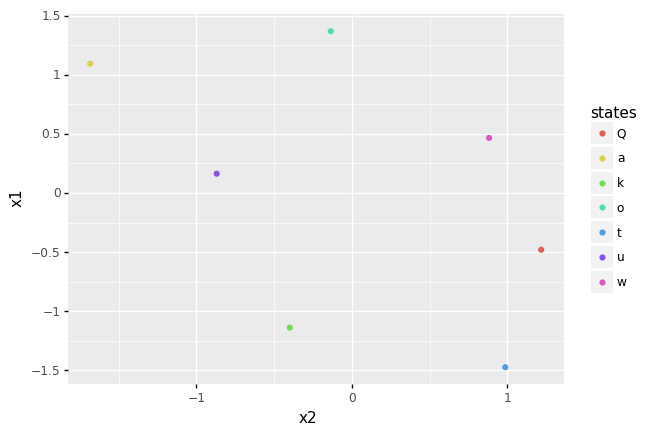

<ggplot: (312648581)>

In [4]:
agent = Agent(config)
means = agent.means
means_df = pd.DataFrame({"states": agent.states, "x1": means[:, 0], "x2": means[:, 1]})
means_df.to_csv('../data/means.csv', index=False)

(ggplot(means_df, aes(x='x2', y='x1', color='states'))
 + geom_point()
)

In [5]:
# save them as yml
from omegaconf.dictconfig import DictConfig
from omegaconf import OmegaConf
yml_dir = "../hyparam/config.yml"
with open(yml_dir, "w" ) as f:
    OmegaConf.save(config=config, f=f.name)
    loaded = OmegaConf.load(f.name)
    assert config == loaded

## Load & sample

In [6]:
from hydra.experimental import initialize, compose
# https://hydra.cc/docs/next/experimental/compose_api

with initialize(config_path="../hyparam"):
    config = compose(config_name="config.yml")

In [7]:
config.umap

{'n_components': 2, 'random_state': 42, 'n_neighbors': 5, 'min_dist': 0.5820618376319409}

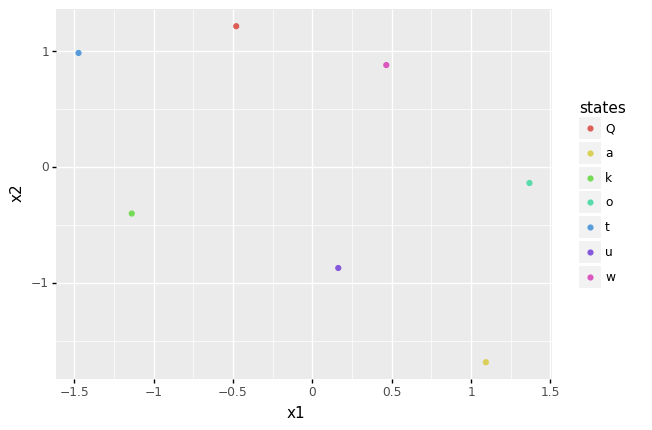

<ggplot: (313545732)>

In [8]:
agent = Agent(config)
means = agent.means
means_df = pd.DataFrame({"states": agent.states, "x1": means[:, 0], "x2": means[:, 1]})
means_df.to_csv('../data/means.csv', index=False)

(ggplot(means_df, aes(x='x1', y='x2', color='states'))
 + geom_point()
)

In [9]:
agent.model.n_states

7

In [10]:
n_sample = 100
sampled_means = []
for state_idx in range(agent.model.n_states):
    xy = np.array([agent.model.emissions.sample_for_state(state_idx) for _ in range(n_sample)])
    lab = np.array([agent.states[state_idx]]*n_sample).reshape(-1, 1)
    sampled_means.append(np.concatenate([lab, xy], axis=1))
    
sampled_means_arr = np.concatenate(sampled_means)

In [11]:
sampled_means_df = pd.DataFrame({"state": sampled_means_arr[:, 0], "x": sampled_means_arr[:, 1], "y": sampled_means_arr[:, 2]})
sampled_means_df.to_csv('../data/sampled_means.csv', index=False)